# Interactive maps: change of economic,housing and demographic characteristics between 2014 and 2018

## What's in this notebook?
In this notebook, we explored the options to map the changes of economic, housing and demographic characteristics between 2014 and 2018 in New York Metro Area. We used the dataset that we created from the preliminary analysis of housing, transit density, economic developmment, and demographic characteristics.

## Data Visualization
We created some interactive maps to visualize the changes in various metrics to charterize the housing, economic and demographic change between 2014 and 2018. 

# Importing libraries

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import contextily as ctx
from sodapy import Socrata

import folium
from folium import plugins
from folium.plugins import MarkerCluster

# to explore point patterns
from pointpats import centrography
from matplotlib.patches import Ellipse
import numpy as np
import plotly.express as px

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


# Data exploration 

In [2]:
# importing county border shapefile
countyborder = gpd.read_file('cb_2018_us_county_500k.shp')
countyborder.head()

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID     NAME LSAD       ALAND  \
0      21      007  00516850  0500000US21007  21007  Ballard   06   639387454   
1      21      017  00516855  0500000US21017  21017  Bourbon   06   750439351   
2      21      031  00516862  0500000US21031  21031   Butler   06  1103571974   
3      21      065  00516879  0500000US21065  21065   Estill   06   655509930   
4      21      069  00516881  0500000US21069  21069  Fleming   06   902727151   

     AWATER                                           geometry  
0  69473325  POLYGON ((-89.18137 37.04630, -89.17938 37.053...  
1   4829777  POLYGON ((-84.44266 38.28324, -84.44114 38.283...  
2  13943044  POLYGON ((-86.94486 37.07341, -86.94346 37.074...  
3   6516335  POLYGON ((-84.12662 37.64540, -84.12483 37.646...  
4   7182793  POLYGON ((-83.98428 38.44549, -83.98246 38.450...

In [3]:
# import metrics dataset with housing, economic, and demographic characteristic change between 2014 and 2018
# All data in this data set represent changes of various factors in these three categories. 
metric = pd.read_csv('Combined_Census.csv')

In [4]:
metric.head()

AFFGEOID           Geographic Area Name  Out-Migration  \
0  0500000US34017      Hudson County, New Jersey           2849   
1  0500000US34029       Ocean County, New Jersey           -371   
2  0500000US09001  Fairfield County, Connecticut            801   
3  0500000US34003      Bergen County, New Jersey           1359   
4  0500000US34039       Union County, New Jersey           1201   

   Transit Density  Railway Transportation  Total Population  Work From Home  \
0           0.6851                  0.0330             13753          0.0602   
1           0.0031                 -0.0491             10526          0.0507   
2           0.0432                  0.3556             10133          0.3090   
3           0.1284                  0.1696              9543          0.1746   
4           0.1541                 -0.0957              7830          0.0495   

      GDP  Number of Jobs  Income Level  \
0  0.1475          0.0441        0.6609   
1  0.1504          0.0385        0.0795   
2  0.1395          0.0571        0.4526   
3  0.1450          0.0584        0.6739   
4  0.2400          0.0723        1.0136   

   Housing affordability % change for owner-occupied units  \
0                                                8.0         
1                                                7.0         
2                                                6.0         
3                                                8.0         
4                                                8.0         

   Housing affordability % change for rental units  \
0                                              0.0   
1                                              5.0   
2                                             -1.0   
3                                              3.0   
4                                              4.0   

   Median Number of Owned-Units  Median Rent  
0                       -0.0077       0.1178  
1                       -0.0089       0.0710  
2                       -0.0045       0.0692  
3                        0.0135       0.1148  
4                        0.0674       0.1094

In [5]:
#look at datatypes
metric.dtypes

AFFGEOID                                                    object
Geographic Area Name                                        object
Out-Migration                                                int64
Transit Density                                            float64
Railway Transportation                                     float64
Total Population                                             int64
Work From Home                                             float64
GDP                                                        float64
Number of Jobs                                             float64
Income Level                                               float64
Housing affordability % change for owner-occupied units    float64
Housing affordability % change for rental units            float64
Median Number of Owned-Units                               float64
Median Rent                                                float64
dtype: object

In [6]:
#add a column "GEOID" from "AFFGEOID"
metric['GEOID'] = metric['AFFGEOID'].str.strip().str[-5:]
metric.head()

AFFGEOID           Geographic Area Name  Out-Migration  \
0  0500000US34017      Hudson County, New Jersey           2849   
1  0500000US34029       Ocean County, New Jersey           -371   
2  0500000US09001  Fairfield County, Connecticut            801   
3  0500000US34003      Bergen County, New Jersey           1359   
4  0500000US34039       Union County, New Jersey           1201   

   Transit Density  Railway Transportation  Total Population  Work From Home  \
0           0.6851                  0.0330             13753          0.0602   
1           0.0031                 -0.0491             10526          0.0507   
2           0.0432                  0.3556             10133          0.3090   
3           0.1284                  0.1696              9543          0.1746   
4           0.1541                 -0.0957              7830          0.0495   

      GDP  Number of Jobs  Income Level  \
0  0.1475          0.0441        0.6609   
1  0.1504          0.0385        0.0795   
2  0.1395          0.0571        0.4526   
3  0.1450          0.0584        0.6739   
4  0.2400          0.0723        1.0136   

   Housing affordability % change for owner-occupied units  \
0                                                8.0         
1                                                7.0         
2                                                6.0         
3                                                8.0         
4                                                8.0         

   Housing affordability % change for rental units  \
0                                              0.0   
1                                              5.0   
2                                             -1.0   
3                                              3.0   
4                                              4.0   

   Median Number of Owned-Units  Median Rent  GEOID  
0                       -0.0077       0.1178  34017  
1                       -0.0089       0.0710  34029  
2                       -0.0045       0.0692  09001  
3                        0.0135       0.1148  34003  
4                        0.0674       0.1094  34039

In [7]:
#quick look at countyborder dataset
countyborder.head()

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID     NAME LSAD       ALAND  \
0      21      007  00516850  0500000US21007  21007  Ballard   06   639387454   
1      21      017  00516855  0500000US21017  21017  Bourbon   06   750439351   
2      21      031  00516862  0500000US21031  21031   Butler   06  1103571974   
3      21      065  00516879  0500000US21065  21065   Estill   06   655509930   
4      21      069  00516881  0500000US21069  21069  Fleming   06   902727151   

     AWATER                                           geometry  
0  69473325  POLYGON ((-89.18137 37.04630, -89.17938 37.053...  
1   4829777  POLYGON ((-84.44266 38.28324, -84.44114 38.283...  
2  13943044  POLYGON ((-86.94486 37.07341, -86.94346 37.074...  
3   6516335  POLYGON ((-84.12662 37.64540, -84.12483 37.646...  
4   7182793  POLYGON ((-83.98428 38.44549, -83.98246 38.450...

In [8]:
#trim the county border dataset to keep the desired columns
columns_to_keep1 = ['GEOID','geometry','STATEFP']
cb= countyborder [columns_to_keep1]

In [9]:
#define different geographic areas with FIPS code from the county border dataset
#Our analysis focuses on the Non-NYC metro area
NYC_5County = ['36005','36047','36061','36081','36085']
NonNYC_Metro = ['09001','09005','09009','34003','34013','34017','34019','34021','34023',
               '34025','34027','34029','34031','34035','34037','34039','36027','36059',
               '36071','36079','36087','36103','36111','36119','42089','42103']
NonContiguous = ['72','02','15','66','69','78','60']

In [10]:
def regionbyGEOID_NYC(name):
    cb.loc[cb['GEOID'] == name,'Region'] = 'NYC'

def regionbyGEOID_NonNYC_Metro(name):
    cb.loc[cb['GEOID'] == name,'Region'] = 'NonNYC_Metro'

def regionbyGEOID_NonContiguous(name):
    cb.loc[cb['STATEFP'] == name,'Region'] = 'Non_the_contiguous_US'

In [11]:
#create another dataframe of counties in non-NYC metro region
for GEOID in NonNYC_Metro:
    regionbyGEOID_NonNYC_Metro(GEOID)
    
NonNYC_Metro = cb[cb.Region == 'NonNYC_Metro']

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


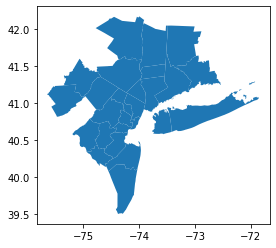

In [12]:
#plot those counties
NonNYC_Metro.plot()

In [13]:
NonNYC_Metro.head(5)

GEOID                                           geometry STATEFP  \
56   09009  MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...      09   
153  34003  POLYGON ((-74.27066 41.02103, -74.25046 41.060...      34   
155  34013  POLYGON ((-74.37623 40.76275, -74.37389 40.762...      34   
156  34023  POLYGON ((-74.63023 40.34313, -74.63047 40.344...      34   
445  34019  POLYGON ((-75.19511 40.57969, -75.19466 40.581...      34   

           Region  
56   NonNYC_Metro  
153  NonNYC_Metro  
155  NonNYC_Metro  
156  NonNYC_Metro  
445  NonNYC_Metro

In [14]:
#create FIPS based on the GEOID in the dataset
NonNYC_Metro['FIPS']=NonNYC_Metro['GEOID']

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [15]:
#merge the geodataframe with metric data frame
demo = NonNYC_Metro.merge(metric,on='GEOID',how='left')

In [16]:
# a quick look at the data
demo.head()

GEOID                                           geometry STATEFP  \
0  09009  MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...      09   
1  34003  POLYGON ((-74.27066 41.02103, -74.25046 41.060...      34   
2  34013  POLYGON ((-74.37623 40.76275, -74.37389 40.762...      34   
3  34023  POLYGON ((-74.63023 40.34313, -74.63047 40.344...      34   
4  34019  POLYGON ((-75.19511 40.57969, -75.19466 40.581...      34   

         Region   FIPS        AFFGEOID           Geographic Area Name  \
0  NonNYC_Metro  09009  0500000US09009  New Haven County, Connecticut   
1  NonNYC_Metro  34003  0500000US34003      Bergen County, New Jersey   
2  NonNYC_Metro  34013  0500000US34013       Essex County, New Jersey   
3  NonNYC_Metro  34023  0500000US34023   Middlesex County, New Jersey   
4  NonNYC_Metro  34019  0500000US34019   Hunterdon County, New Jersey   

   Out-Migration  Transit Density  Railway Transportation  Total Population  \
0            506           0.0161                  0.0893             -3809   
1           1359           0.1284                  0.1696              9543   
2           2411           0.3058                  0.1165              3939   
3            255           0.0318                 -0.0478              2652   
4            -52           0.0091                  0.3594             -1695   

   Work From Home     GDP  Number of Jobs  Income Level  \
0          0.1997  0.1238          0.0684        0.3806   
1          0.1746  0.1450          0.0584        0.6739   
2          0.1739  0.1722          0.0460        0.3081   
3          0.1152  0.2122          0.0645        0.2652   
4          0.0523  0.1274          0.0427        0.3661   

   Housing affordability % change for owner-occupied units  \
0                                                6.0         
1                                                8.0         
2                                                7.0         
3                                                8.0         
4                                                7.0         

   Housing affordability % change for rental units  \
0                                              5.0   
1                                              3.0   
2                                              1.0   
3                                              0.0   
4                                             -2.0   

   Median Number of Owned-Units  Median Rent  
0                       -0.0138       0.1056  
1                        0.0135       0.1148  
2                        0.0034       0.1027  
3                       -0.0074       0.0580  
4                        0.0021       0.0851

In [17]:
#creaet a new column"FIPS" from "GEOID" for later analysis
demo['FIPS']=demo['GEOID']
demo.head()

GEOID                                           geometry STATEFP  \
0  09009  MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...      09   
1  34003  POLYGON ((-74.27066 41.02103, -74.25046 41.060...      34   
2  34013  POLYGON ((-74.37623 40.76275, -74.37389 40.762...      34   
3  34023  POLYGON ((-74.63023 40.34313, -74.63047 40.344...      34   
4  34019  POLYGON ((-75.19511 40.57969, -75.19466 40.581...      34   

         Region   FIPS        AFFGEOID           Geographic Area Name  \
0  NonNYC_Metro  09009  0500000US09009  New Haven County, Connecticut   
1  NonNYC_Metro  34003  0500000US34003      Bergen County, New Jersey   
2  NonNYC_Metro  34013  0500000US34013       Essex County, New Jersey   
3  NonNYC_Metro  34023  0500000US34023   Middlesex County, New Jersey   
4  NonNYC_Metro  34019  0500000US34019   Hunterdon County, New Jersey   

   Out-Migration  Transit Density  Railway Transportation  Total Population  \
0            506           0.0161                  0.0893             -3809   
1           1359           0.1284                  0.1696              9543   
2           2411           0.3058                  0.1165              3939   
3            255           0.0318                 -0.0478              2652   
4            -52           0.0091                  0.3594             -1695   

   Work From Home     GDP  Number of Jobs  Income Level  \
0          0.1997  0.1238          0.0684        0.3806   
1          0.1746  0.1450          0.0584        0.6739   
2          0.1739  0.1722          0.0460        0.3081   
3          0.1152  0.2122          0.0645        0.2652   
4          0.0523  0.1274          0.0427        0.3661   

   Housing affordability % change for owner-occupied units  \
0                                                6.0         
1                                                8.0         
2                                                7.0         
3                                                8.0         
4                                                7.0         

   Housing affordability % change for rental units  \
0                                              5.0   
1                                              3.0   
2                                              1.0   
3                                              0.0   
4                                             -2.0   

   Median Number of Owned-Units  Median Rent  
0                       -0.0138       0.1056  
1                        0.0135       0.1148  
2                        0.0034       0.1027  
3                       -0.0074       0.0580  
4                        0.0021       0.0851

# Create interactive to visualize the changes

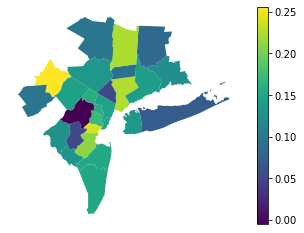

In [18]:
#create a map with GDP change between 2014 and 2018
def metrics(factor= 'GDP'):
        
    # plot it
    fig,ax = plt.subplots()

    # map
    demo.plot(ax=ax,
              column=factor, 
              legend=True)

    ax.axis('off')
metrics()

In [19]:
#import ipywidgets to create interactive maps
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [20]:
#create a new datafram with columns to map, and make a list
df = pd.DataFrame(demo, columns = 
[
 'Railway Transportation',
 'Total Population',
 'Work From Home',
 'GDP',
 'Number of Jobs',
 'Income Level',
 'Housing affordability % change for owner-occupied units',
 'Housing affordability % change for rental units',
 'Median Number of Owned-Units',
 'Median Rent'])
factors = df.columns.values.tolist()
factors

['Railway Transportation',
 'Total Population',
 'Work From Home',
 'GDP',
 'Number of Jobs',
 'Income Level',
 'Housing affordability % change for owner-occupied units',
 'Housing affordability % change for rental units',
 'Median Number of Owned-Units',
 'Median Rent']

In [21]:
#add those columns to indicators
indicators = [
 'Railway Transportation',
 'Total Population',
 'Work From Home',
 'GDP',
 'Number of Jobs',
 'Income Level',
 'Housing affordability % change for owner-occupied units',
 'Housing affordability % change for rental units',
 'Median Number of Owned-Units',
 'Median Rent']

## Ipywidgets and choropleth map

In [22]:
#create interactive maps
@interact

def metrics(factor = factors):
        
    # plot it
    fig,ax = plt.subplots(figsize=(15,10))

    # map
    demo.plot(ax=ax,
              column=factor,
              legend=True,
             )

    ax.axis('off')
for indicator in indicators:
    metrics

interactive(children=(Dropdown(description='factor', options=('Railway Transportation', 'Total Population', 'W…

## Folium map

In [26]:
#Create a base map
m = folium.Map(location=[40.730610,-73.935242],
           tiles='OpenStreetMap',
          zoom_start=8.5
          )

In [27]:
# create a for loop
for indicator in indicators:
#create folium map for the indicators
    folium.Choropleth(geo_data=NonNYC_Metro,
                 data=demo,
                 name=indicator,
                 columns=['FIPS',indicator],
                 key_on="feature.properties.FIPS",
                 fill_color='BuGn',
                 fill_opacity=0.8,
                 line_opacity=0.2,
                 legend=False,
                      highlight=True
                ).add_to(m)
#add layers
folium.LayerControl().add_to(m)
m

In [25]:
m.save('metrics.html')

There are advantages and disadvantages to each of these mapping methods. For the first method, there is little interactive components, but visually it's clean and nice to look at. With the folium map, there are a lot of interactions, but due to the limited time, we did not find a way to only show the legend based on the layer, which made it looks "crowded". We hope to investigate more options for mapping and to improve the folium map in the future. 